# Predicting PV Installation

In this notebook, we aim to train a model to predict the quarterly installation counts per county. We will explore both linear models and non-linear models algorithms, and select the best model for predictions.  

In [1]:
%matplotlib inline
import numpy as np
import os
import requests
import pandas as pd 
import matplotlib.pyplot as plt

from pandas.tools.plotting import scatter_matrix

from sklearn import model_selection as ms
#from sklearn import cross_validation as cv
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
#from sklearn.cross_validation import train_test_split as tts

from sklearn.linear_model import Ridge
from sklearn.linear_model import RandomizedLasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [2]:
# loading instance table to train models
installation = pd.read_csv('/Users/graceluningfu/Desktop/ML_predictions/instances_feature02.csv', sep=",")

In [3]:
installation.head()

,geo_id2,sfh_qty,th_qty,households,hhincome_75_below_100k,hhincome_100_below_150k,hhincome_150_below_200k,hhincome_above_200k,dm_share * (sfh + th),exp(interconn) * (sfh + th),exp(net_metering) * (sfh + th),exp(grid_to_panel) * (sfh + th),latitude,count
0,41017,60602,2940,66337,8425,8358,2189,2587,28706,172725,172725,127602,43.92,1
1,41003,21747,1434,33840,4365,4332,1929,1286,14487,63012,63012,46551,44.49,1
2,41031,6615,103,7692,923,592,131,77,2727,18261,18261,13491,44.64,1
3,41039,98806,8055,146235,16378,14331,4387,3363,64236,290478,290478,214592,43.93,2
4,41053,20918,1053,28458,3756,3899,1081,569,10186,59723,59723,44121,44.90,1


In [4]:
installation.describe()

,geo_id2,sfh_qty,th_qty,households,hhincome_75_below_100k,hhincome_100_below_150k,hhincome_150_below_200k,hhincome_above_200k,dm_share * (sfh + th),exp(interconn) * (sfh + th),exp(net_metering) * (sfh + th),exp(grid_to_panel) * (sfh + th),latitude,count
count,12183.000000,1.218300e+04,12183.000000,1.218300e+04,12183.000000,12183.000000,12183.000000,12183.000000,1.218300e+04,1.218300e+04,1.218300e+04,1.218300e+04,12183.000000,12183.000000
mean,30178.263892,9.477498e+04,11855.355988,1.514793e+05,18517.158335,22075.024871,9768.778462,10777.460560,5.834469e+04,2.609422e+06,1.683682e+06,1.243350e+06,39.723439,57.193138
std,15694.573002,1.692525e+05,29376.307979,2.979526e+05,35286.566071,42472.819528,19695.904649,24262.084539,1.172976e+05,1.244159e+07,7.992523e+06,3.092933e+06,4.070128,271.266667
min,4001.000000,6.520000e+02,1.000000,6.710000e+02,66.000000,16.000000,0.000000,0.000000,7.000000e+00,1.775000e+03,1.775000e+03,2.099000e+03,25.600000,1.000000
25%,12057.000000,1.983900e+04,571.000000,2.213300e+04,2764.000000,2514.000000,679.000000,515.000000,9.722000e+03,1.432575e+05,6.790800e+04,1.592045e+05,38.050000,1.000000
50%,35029.000000,4.186000e+04,2647.000000,5.524000e+04,7194.000000,7536.000000,2585.000000,1942.000000,2.196500e+04,3.911690e+05,1.869500e+05,4.275260e+05,40.670000,4.000000
75%,41027.000000,1.082075e+05,10398.000000,1.663450e+05,22712.000000,25601.000000,11488.000000,9482.000000,6.423600e+04,1.203562e+06,5.321890e+05,1.128642e+06,42.590000,18.000000
max,55141.000000,1.721774e+06,392510.000000,3.263069e+06,378516.000000,443777.000000,195784.000000,228415.000000,1.341831e+06,1.731162e+08,8.431411e+07,7.793894e+07,47.880000,8054.000000


In [5]:
installation.shape
# The shape of the data incicates that the dataset has 12183 instances and 13 features

(12183, 14)

## Feature Visualization. Are they predictive?

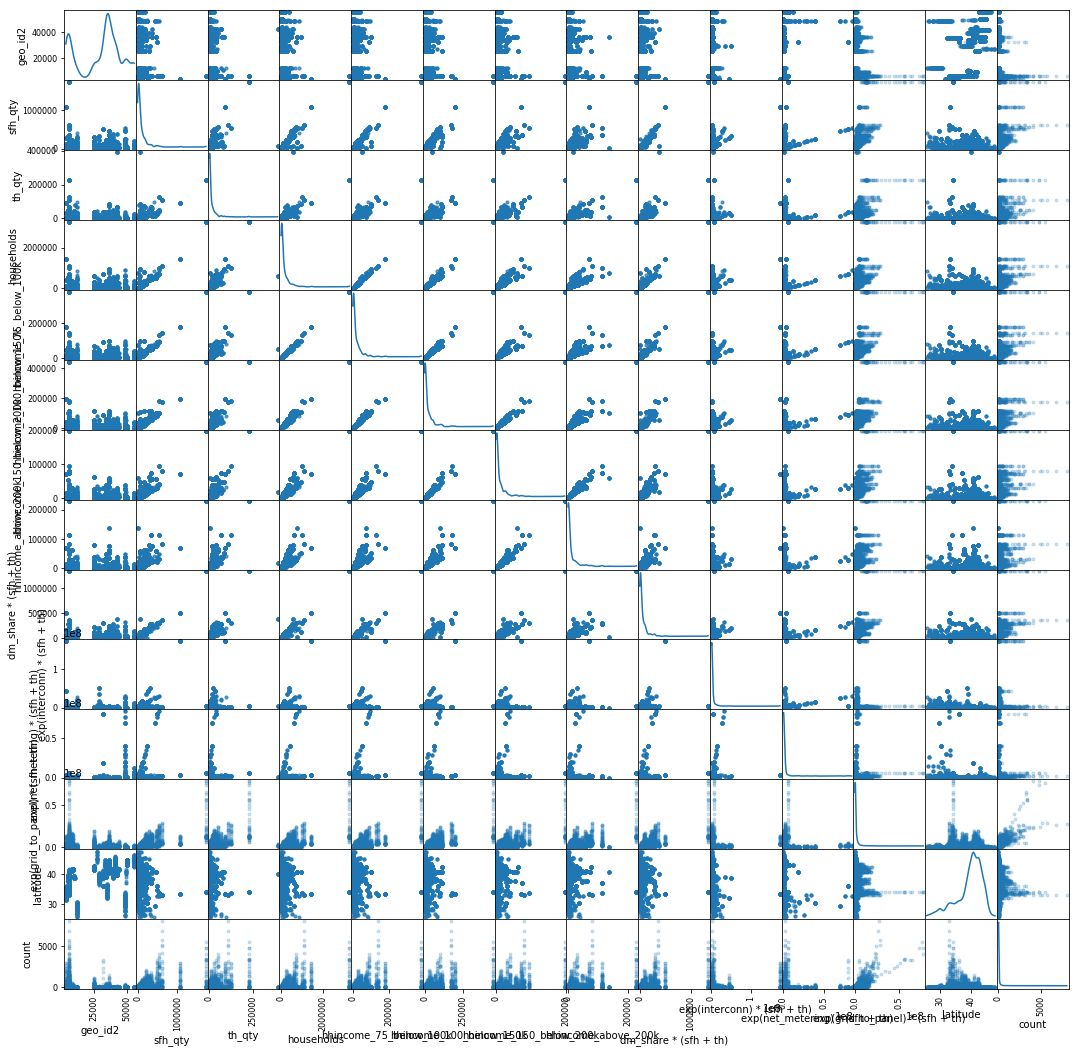

In [6]:
# A visualization of the correlation between features

scatter_matrix(installation, alpha=0.2, figsize=(18,18), diagonal='kde')
plt.show()

In [7]:
# Define the features and label from the loaded CSV file

installation_features = installation.ix[:,1:13]
installation_labels = installation.ix[:,13]

In [8]:
#preview of the features
installation_features.head()

,sfh_qty,th_qty,households,hhincome_75_below_100k,hhincome_100_below_150k,hhincome_150_below_200k,hhincome_above_200k,dm_share * (sfh + th),exp(interconn) * (sfh + th),exp(net_metering) * (sfh + th),exp(grid_to_panel) * (sfh + th),latitude
0,60602,2940,66337,8425,8358,2189,2587,28706,172725,172725,127602,43.92
1,21747,1434,33840,4365,4332,1929,1286,14487,63012,63012,46551,44.49
2,6615,103,7692,923,592,131,77,2727,18261,18261,13491,44.64
3,98806,8055,146235,16378,14331,4387,3363,64236,290478,290478,214592,43.93
4,20918,1053,28458,3756,3899,1081,569,10186,59723,59723,44121,44.90


In [9]:
#preview of the label
installation_labels.head()

0    1
1    1
2    1
3    2
4    1
Name: count, dtype: int64

## Evaluation of Feature Importance by Randomized Lasso

Randomized Lasso works by subsampling the training data and computing a Lasso estimate where the penalty of a random subset of coefficients has been scaled. 

In [10]:
model = RandomizedLasso(alpha=0.1)
model.fit(installation_features, installation_labels)
names = list(installation_features)

print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), model.scores_), 
                 names), reverse=True))



Features sorted by their score:
[(1.0, 'exp(grid_to_panel) * (sfh + th)'), (0.93500000000000005, 'exp(interconn) * (sfh + th)'), (0.495, 'hhincome_above_200k'), (0.495, 'dm_share * (sfh + th)'), (0.46500000000000002, 'latitude'), (0.22, 'hhincome_150_below_200k'), (0.17999999999999999, 'households'), (0.105, 'hhincome_100_below_150k'), (0.025000000000000001, 'hhincome_75_below_100k'), (0.0050000000000000001, 'th_qty'), (0.0, 'sfh_qty'), (0.0, 'exp(net_metering) * (sfh + th)')]


## Split data into train and test set (not kfolds yet)

In [34]:
splits = ms.train_test_split(installation_features, installation_labels, test_size=0.2)
#splits = cv.train_test_split(installation_features, installation_labels, test_size=0.2)
X_train, X_test, y_train, y_test = splits
X_train, X_test, y_train, y_test = splits

# Linear Regression Models: 

### Ridge Regression model

In [12]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

#print(list(zip(installation_features, model.coef_.tolist())))

print("Ridge Regression model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Ridge Regression model
Mean Squared Error: 33326.325
Coefficient of Determination: 0.666


### Linear Regression model

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)
 
expected = y_test
predicted = model.predict(X_test)

#print(list(zip(installation_features, model.coef_.tolist())))

print("Linear Regression model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Linear Regression model
Mean Squared Error: 25011.609
Coefficient of Determination: 0.717


### Perceptron Model

A primitive neural network that learns weights for input vectors and transfers the weights through a network to make a prediction.

In [17]:
from sklearn.linear_model import Perceptron

model = Perceptron()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

# Evaluate fit of the model
print("Perceptron model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Perceptron model
Mean Squared Error: 514595.392
Coefficient of Determination: -6.178


### Support Vector Machine Model

In [19]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

# Evaluate fit of the model
print("Support Vector Machines SVM model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Support Vector Machines SVM model
Mean Squared Error: 96551.350
Coefficient of Determination: -0.039


### SGDRegressor Model

Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule 

In [21]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

# Evaluate fit of the model
print("SGDRegressor model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

SGDRegressor model
Mean Squared Error: 91780463769386845201565757565318787198074486784.000
Coefficient of Determination: -1135414449635456942869815568698779856011264.000


## Kfolds (12 folds) cross validation for Linear regression Model

In [26]:
reg1 = LinearRegression()
cv_results = cross_val_score(reg1,installation_features, installation_labels, cv=12)
print (cv_results)
np.mean(cv_results)

[-42.41599037  -2.03391369   0.55554711   0.39138021  -0.3257125
   0.39633057   0.41863438   0.39570851   0.64353014   0.74438292
   0.77882944   0.60925827]


-3.3201679184711144

# Non-Linear Regression Models:

## Decision Tree Regressor

In [28]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

#print(list(zip(installation_features, model.feature_importances_.tolist())))

print("DecisionTreeRegressor")
print("Mean squared error = %0.3f" % mse(expected, predicted))
print("R2 score = %0.3f" % r2_score(expected, predicted))

DecisionTreeRegressor
Mean squared error = 4507.981
R2 score = 0.947


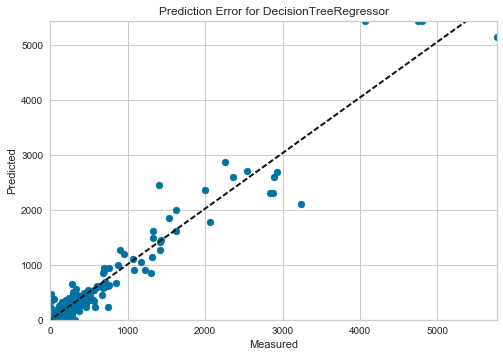

In [29]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(DecisionTreeRegressor())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [30]:
reg = DecisionTreeRegressor()
cv_results = cross_val_score(reg,installation_features, installation_labels, cv=12)
print (cv_results)
np.mean(cv_results)

[-0.62735308  0.2282387   0.77566414  0.84311827  0.47330434  0.6038336
  0.67765378  0.44461836  0.83894412  0.78410177  0.7113248   0.73555557]


0.54075036279236222

## Random Forest Regressor

Random forest works as an ensemble regression where many decision tree models are fit and predictions are aggregated across the trees. It reduces variance is by training on different samples of the data, which also makes it less sensitive to outliers in training data.

In [31]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

#print(list(zip(installation_features, model.feature_importances_.tolist())))

print("Random Forest model")
print("Mean squared error = %0.3f" % mse(expected, predicted))
print("R2 score = %0.3f" % r2_score(expected, predicted))

Random Forest model
Mean squared error = 3511.434
R2 score = 0.959


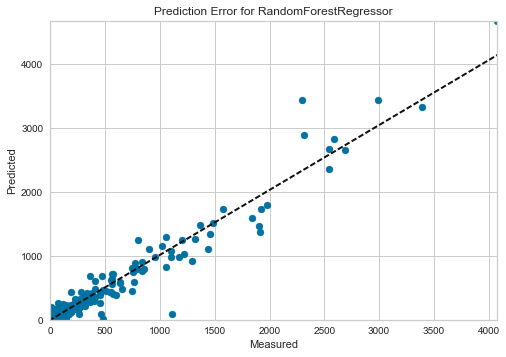

In [35]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(RandomForestRegressor())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [36]:
reg = RandomForestRegressor()
cv_results = cross_val_score(reg,installation_features, installation_labels, cv=12)
print (cv_results)
np.mean(cv_results)

[-0.35810619  0.36966503  0.79185729  0.90393849  0.70413722  0.60277845
  0.75631566  0.56759455  0.81089882  0.79091244  0.91460894  0.78678901]


0.63678247458357495

### Pickle the best model -- The ramdom Forest model

In [37]:
import pickle

filename='Randomforest.pickle'
with open(filename, 'wb') as f:
    pickle.dump(model, f)

## Kneighbors Regressor

In [38]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

# Evaluate fit of the model
print("KNeighborsRegressor Model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

KNeighborsRegressor Model
Mean Squared Error: 10630.097
Coefficient of Determination: 0.806


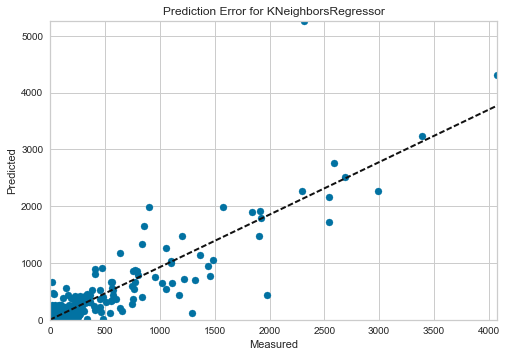

In [39]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(KNeighborsRegressor())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [40]:
reg = KNeighborsRegressor()
cv_results = cross_val_score(reg,installation_features, installation_labels, cv=12)
print (cv_results)
np.mean(cv_results)

[-0.02274205  0.43923663  0.85348177  0.86971261  0.61577076  0.8018382
  0.15371624  0.42202617  0.77613887 -0.83132266  0.82861998  0.60104482]


0.45896011213470017

## Which one did best? Random Forest

Based on visual observation, it appeared clear that the Random Forest regression model suffered significantly less from heteroscedasticity than the other models. While each of the models suffered from observable increases in variance as the predicted and actual values of the installation counts rose, the Random Forest model by visual inspection was clearly less impacted by this phenomenon than the other non-linear models.

1) Visual inspection of the model results suggest lower levels of heteroscedasticity in the Random Forest regression model
2) Cross-validation results support Random Forest model as the superior predictor of residential PV rooftop installation

# Procedure to use the pickled random forest model for prediction

### Step one: Load  the pickle for predictions

In [41]:
filename='Randomforest.pickle'
features=installation.ix[5:10, 1:13]
loaded_model = pickle.load(open(filename, 'rb'))




### Step two: Load the feature table

In [44]:
predict_X=installation.ix[5:10, 1:13]

predict_X


,sfh_qty,th_qty,households,hhincome_75_below_100k,hhincome_100_below_150k,hhincome_150_below_200k,hhincome_above_200k,dm_share * (sfh + th),exp(interconn) * (sfh + th),exp(net_metering) * (sfh + th),exp(grid_to_panel) * (sfh + th),latitude
5,98806,8055,146235,16378,14331,4387,3363,64236,290478,290478,219705,43.93
6,98806,8055,146235,16378,14331,4387,3363,64236,290478,290478,237780,43.93
7,184793,14778,310669,38834,41630,14601,16465,151277,542490,542490,444072,45.55
8,6615,103,7692,923,592,131,77,2727,18261,18261,14948,44.64
9,60602,2940,66337,8425,8358,2189,2587,28706,172725,172725,141389,43.92
10,2785,43,3526,205,279,46,7,592,7687,7687,6293,42.79


### Step three: Use pickled random forest model for predictions

In [47]:
# FYI, features are as follows:
predicted_counts = loaded_model.predict(predict_X)
print(predicted_counts)

[ 1.5  1.2  1.   1.5  1.4  1. ]


### Step four: Save the predicted results in a CSV file 

In [48]:
# write the predicted result to a file
predict_X['predictions'] = predicted_counts
predict_X.to_csv('prediction00.csv')